In [ ]:
 import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
#Categorical columns : [person_home_ownership, loan_intent] - One hot encoder, [loan_grade, cb_person_default_in_file] - Label Encoder


In [ ]:
#Null values
df.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [ ]:
#Duplicate rows
df.duplicated().sum()

137

In [ ]:
df = df.drop_duplicates()

In [ ]:
#Shape of the data
df.shape

(28501, 12)

In [ ]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
#Dealing with categorical variables
label_encoder = LabelEncoder()
df['loan_grade'] = label_encoder.fit_transform(df['loan_grade'])
df['cb_person_default_on_file'] = label_encoder.fit_transform(df['cb_person_default_on_file'])
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,3,35000,16.02,1,0.59,1,3
1,21,9600,OWN,5.0,EDUCATION,1,1000,11.14,0,0.10,0,2
2,25,9600,MORTGAGE,1.0,MEDICAL,2,5500,12.87,1,0.57,0,3
3,23,65500,RENT,4.0,MEDICAL,2,35000,15.23,1,0.53,0,2
4,24,54400,RENT,8.0,MEDICAL,2,35000,14.27,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,2,5800,13.16,0,0.11,0,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,0,17625,7.49,0,0.15,0,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,1,35000,10.99,1,0.46,0,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,1,15000,11.48,0,0.10,0,26


In [ ]:
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent'], drop_first=True, dtype = float)


In [ ]:
df

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,59000,123.0,3,35000,16.02,1,0.59,1,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,21,9600,5.0,1,1000,11.14,0,0.10,0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,25,9600,1.0,2,5500,12.87,1,0.57,0,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,23,65500,4.0,2,35000,15.23,1,0.53,0,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,24,54400,8.0,2,35000,14.27,1,0.55,1,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,2,5800,13.16,0,0.11,0,30,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32577,54,120000,4.0,0,17625,7.49,0,0.15,0,19,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32578,65,76000,3.0,1,35000,10.99,1,0.46,0,28,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
32579,56,150000,5.0,1,15000,11.48,0,0.10,0,26,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#Checking outliers
def find_outliers(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  return df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]

In [ ]:
outlier_cols = df[['person_age','person_income','person_emp_length','cb_person_cred_hist_length']]
for i in outlier_cols:
  print(find_outliers(df,i).shape)

(1296, 18)
(1324, 18)
(772, 18)
(981, 18)


In [ ]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5*IQR
    upper_range = Q3 + 1.5*IQR
    df[col] = np.where(df[col]>upper_range, upper_range, df[col])
    df[col] = np.where(df[col]<lower_range, lower_range, df[col])
    return df

for i in outlier_cols:
  df = remove_outliers(df, i)

In [ ]:
df

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,59000.0,14.5,3,35000,16.02,1,0.59,1,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,21.0,9600.0,5.0,1,1000,11.14,0,0.10,0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,25.0,9600.0,1.0,2,5500,12.87,1,0.57,0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,23.0,65500.0,4.0,2,35000,15.23,1,0.53,0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,24.0,54400.0,8.0,2,35000,14.27,1,0.55,1,4.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,40.5,53000.0,1.0,2,5800,13.16,0,0.11,0,15.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32577,40.5,120000.0,4.0,0,17625,7.49,0,0.15,0,15.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32578,40.5,76000.0,3.0,1,35000,10.99,1,0.46,0,15.5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
32579,40.5,140750.0,5.0,1,15000,11.48,0,0.10,0,15.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#Train Test Split
X = df.drop('loan_status', axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

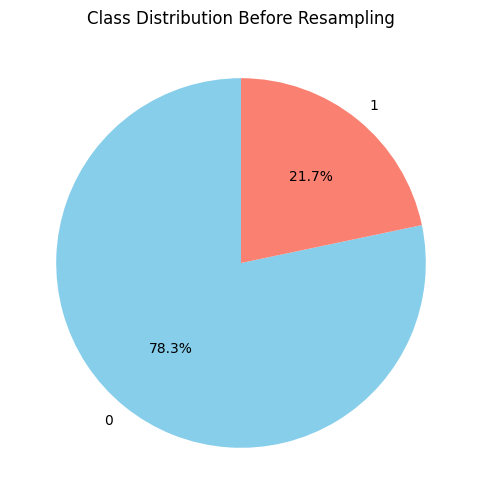

In [ ]:
#Before SMOTE
class_counts = df['loan_status'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title("Class Distribution Before Resampling")
plt.show()

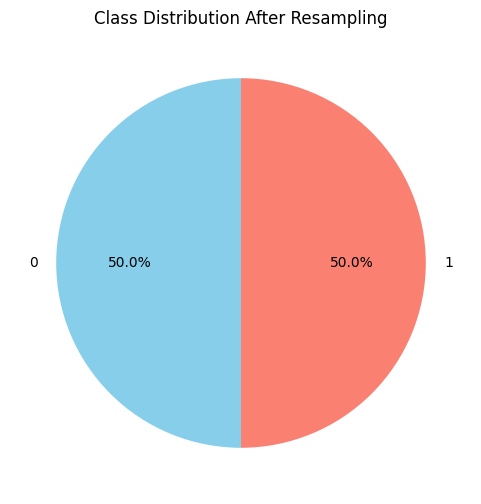

In [ ]:
#After Smote
class_counts = pd.Series(y_resampled).value_counts()
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title("Class Distribution After Resampling")
plt.show()

In [ ]:
#Scaling the features
# scaler = StandardScaler()
# X_resampled = scaler.fit_transform(X_resampled)
# X_test =  scaler.transform(X_test)

In [ ]:
#Training multiple classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate classifiers
results = {}

for name, clf in classifiers.items():
    clf.fit(X_resampled, y_resampled)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score'],
    }

results_df = pd.DataFrame(results).T
print(results_df)


                           Accuracy  Precision    Recall  F1-Score
Logistic Regression        0.735836   0.811223  0.735836  0.755801
Random Forest              0.931416   0.933001  0.931416  0.927804
Support Vector Classifier  0.761270   0.783665  0.761270  0.770144
K-Nearest Neighbors        0.776530   0.806620  0.776530  0.787133
Decision Tree              0.880021   0.883050  0.880021  0.881322
AdaBoost                   0.873180   0.870519  0.873180  0.871608
Gradient Boosting          0.921768   0.920991  0.921768  0.918350


In [ ]:
results_df['Accuracy'].sort_values(ascending = False)

,Accuracy
Random Forest,0.931416
Gradient Boosting,0.921768
Decision Tree,0.880021
AdaBoost,0.873180
K-Nearest Neighbors,0.776530
Support Vector Classifier,0.761270
Logistic Regression,0.735836
